In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SPAM text message 20170820 - Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
print(len(data))
data.shape

5572


(5572, 2)

In [4]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
np.unique(data['Category'], return_counts=True)

(array(['ham', 'spam'], dtype=object), array([4825,  747], dtype=int64))

<Axes: >

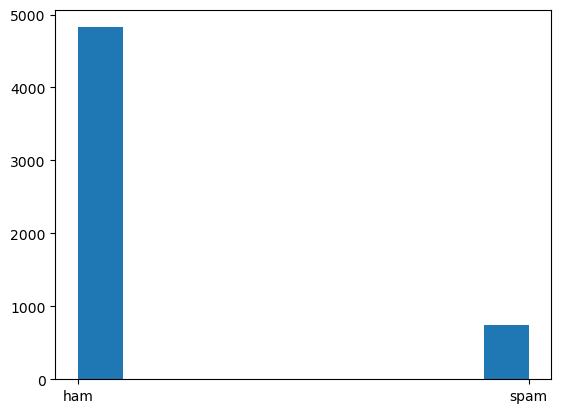

In [5]:
data['Category'].hist(grid=False)

Text(0.5, 1.0, 'Category Distribution')

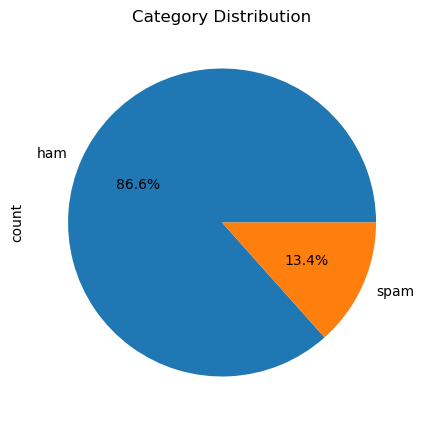

In [6]:
plt.figure(figsize=(5,5))
data['Category'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Category Distribution')

In [7]:
data['Category'].replace({'ham':0, 'spam':1}, inplace=True)

C:\Users\aKBAR\AppData\Local\Temp\ipykernel_18068\1193597030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Category'].replace({'ham':0, 'spam':1}, inplace=True)
C:\Users\aKBAR\AppData\Local\Temp\ipykernel_18068\1193597030.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Category

In [8]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['Message'][1]

'Ok lar... Joking wif u oni...'

In [10]:
print(data['Message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [11]:
with open('stopwords_english.txt', encoding='utf-8') as f:
    stop_word = f.readlines()

stop_word[:10]

['a\n',
 "a's\n",
 'able\n',
 'about\n',
 'above\n',
 'according\n',
 'accordingly\n',
 'across\n',
 'actually\n',
 'after\n']

In [12]:
stop_words = list(set([line.replace('\n', '') for line in stop_word]))
stop_words[:10]

['therere',
 'ag',
 'self',
 'affected',
 'empty',
 'given',
 'full',
 'parted',
 "where'd",
 'ge']

In [13]:
len(stop_words)

1298

In [14]:
from nltk.stem.porter import PorterStemmer
import re
from hazm import word_tokenize
stemmer = PorterStemmer()

dataset = pd.DataFrame(columns=('Category', 'Message'))

for row, sentence in data.iterrows():
    words = sentence['Message']
    # WhiteSpace
    words = re.sub(' +', ' ', words)
     # Re
    words = re.sub('[^a-zA-Z]', ' ', words)
    # Lower Case
    words = words.lower()
    # Tokenization
    words_tokenization = word_tokenize(words)
    # Stop Words
    words_tokenization_filtered = [token for token in words_tokenization if not token in stop_words]
    # Stemming 
    words_Stemming = [stemmer.stem(token) for token in words_tokenization_filtered]

    dataset.loc[row] = {
        'Category' : sentence['Category'],
        'Message' : ' '.join(words_Stemming)
    }

In [15]:
dataset.head()

,Category,Message
0,0,jurong crazi bugi buffet cine amor wat
1,0,lar joke wif oni
2,1,entri wkli comp win fa cup final tkt fa receiv...
3,0,dun hor
4,0,nah usf live


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(dataset['Message']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y = dataset['Category']
print(np.shape(X))
print(np.shape(y))

(5572, 5856)
(5572,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [19]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
model = mn.fit(X_train, y_train)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(f"Accuracy for train : {model.score(X_train, y_train)}")
print(f"Accuracy for test : {model.score(X_test, y_test)}")

Accuracy for train : 0.9744222571236257
Accuracy for test : 0.9650224215246637


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       955
        Spam       1.00      0.76      0.86       160

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [24]:
print(f"Accuracy : {acc}")
print(f"Precision : {pre}")
print(f"Recall : {rec}")

Accuracy : 0.9650224215246637
Precision : 1.0
Recall : 0.75625


# Random under Sampler

In [27]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

In [28]:
print(X_rus.shape)
print(y_rus.shape)

(1494, 5856)
(1494,)


In [29]:
print(f"Count for Target : {np.unique(y, return_counts=True)}")
print(f"Count for before balanced Target : {np.unique(y_rus, return_counts=True)}")

Count for Target : (array([0, 1], dtype=int64), array([4825,  747], dtype=int64))
Count for before balanced Target : (array([0, 1], dtype=int64), array([747, 747], dtype=int64))


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size= 0.20, random_state=0)

In [31]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
model = mn.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(f"Accuracy for train : {model.score(X_train, y_train)}")
print(f"Accuracy for test : {model.score(X_test, y_test)}")

Accuracy for train : 0.9489539748953975
Accuracy for test : 0.8996655518394648


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.83      0.89       151
        Spam       0.85      0.97      0.91       148

    accuracy                           0.90       299
   macro avg       0.91      0.90      0.90       299
weighted avg       0.91      0.90      0.90       299



# RandomOverSampler

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [36]:
print(X_ros.shape)
print(y_ros.shape)

(9650, 5856)
(9650,)


In [37]:
print(f"Count for Target : {np.unique(y, return_counts=True)}")
print(f"Count for before balanced Target : {np.unique(y_ros, return_counts=True)}")

Count for Target : (array([0, 1], dtype=int64), array([4825,  747], dtype=int64))
Count for before balanced Target : (array([0, 1], dtype=int64), array([4825, 4825], dtype=int64))


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size= 0.20, random_state=0)

In [39]:
mn = MultinomialNB()
model2 = mn.fit(X_train, y_train)

In [40]:
y_pred = model2.predict(X_test)

In [41]:
print(f"Accuracy for train : {model2.score(X_train, y_train)}")
print(f"Accuracy for test : {model2.score(X_test, y_test)}")

Accuracy for train : 0.9756476683937824
Accuracy for test : 0.9637305699481865


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.99      0.94      0.96       942
        Spam       0.94      0.99      0.97       988

    accuracy                           0.96      1930
   macro avg       0.97      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930

